## **310. Minimum Height Trees**

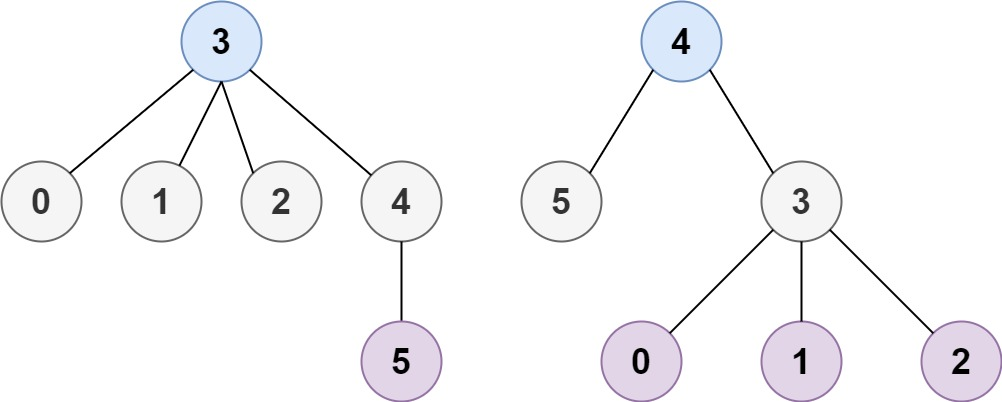

Input: n = 6, edges = [[3,0],[3,1],[3,2],[3,4],[5,4]]
Output: [3,4]

#### **Topological Sort**

To solve this problem, we can follow the idea of "peeling an onion" from the outside layer. The basic idea is as follows:

1. Initialize Leaves: Start by identifying all the leaves of the tree (nodes with only one edge).

2. Peel the Onion: Remove the current leaves, reduce the degree of each affected node (node which was connected to a removed leaf), and then determine the new leaves.

3. Repeat: Continue this process until we're left with one or two nodes, which will be our answer since a tree of n nodes has at most 2 MHTs.

In [ ]:

from collections import defaultdict
import math
class Solution:

    def findMinHeightTrees(self, n: int, edges: List[List[int]]) -> List[int]:

        if(n==0) : return []

        if(n==1) : return [0]

        if(len(edges) == 1) : return edges[0]

        G = defaultdict(list)

        IND = [0]*n

        for x in edges:

            IND[x[0]] += 1
            IND[x[1]] += 1

            G[x[0]].append(x[1])
            G[x[1]].append(x[0])

        Q = []

        for i in range(n):

            if(IND[i] == 1) : Q.append(i)

        processed = 0
        
        while (n-processed > 2):  # remaining

            L = len(Q)

            processed += L

            for _ in range(L):

                u = Q.pop(0)

                for v in G[u]: 

                    IND[v] = IND[v] - 1

                    if(IND[v] == 1) :

                        Q.append(v)

        
        return Q